In [1]:
import numpy as np
import matplotlib.pyplot as p
from scipy.io import wavfile
import dft_wav as dft

44100


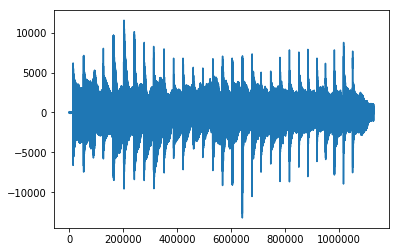

In [429]:
rate, data = wavfile.read("Recording_2.wav")
p.plot(data)
print(rate)

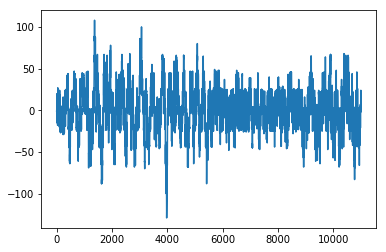

In [419]:
data1 = data[0:11000]
p.plot(data1)

In [15]:
#%%timeit
#xt, vt= dft.dft(data1, rate)

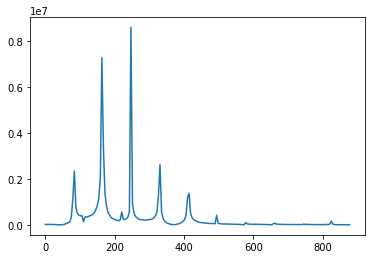

In [16]:
start = 0
end = 200
xt, vt= dft.dft(data1, rate)
p.plot(xt[start:end]/(np.pi*2),np.abs(vt[start:end]))
# sollte peak bei 83 Hz ergeben

In [29]:
vtt = dft.idft(vt, rate)

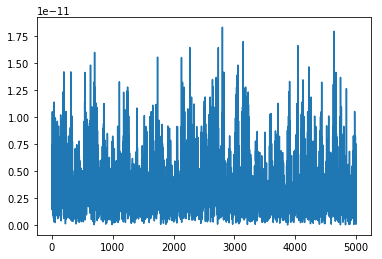

In [33]:
p.plot(np.abs(vtt-data1))

In [397]:
def linearity_test(signal1,signal2,rate1=1,rate2=1):
    #testing the linearity of the DFT for test signals with same sample rate
    if type(signal1) == str:
        assert signal1.endswith(".wav"), "file is not a wavefile"
        rate1, v1 = wavfile.read(signal1)
    else:
        v1 = signal1
    assert len(np.shape(v1)) == 1, "input array needs to be one-dimensional"
    if type(signal2) == str:
        assert signal2.endswith(".wav"), "file is not a wavefile"
        rate2, v2 = wavfile.read(signal2)
    else:
        v2 = signal2
    assert len(np.shape(v2)) == 1, "input array needs to be one-dimensional"
    
    if rate1!=rate2:
        raise linearity_test('Your sample rates must be equal!')
    
    if len(v1)>11000:
        v1=v1[0:11000]
    if len(v2)>11000:
        v2=v2[0:11000]
    alpha=10*(np.random.rand()-0.5)+1j*10*(np.random.rand()-0.5)
    beta=10*(np.random.rand()-0.5)+1j*10*(np.random.rand()-0.5)
    v1=v1[0:min(len(v1),len(v2))]
    v2=v2[0:min(len(v1),len(v2))]
    xt1,vt1=dft.dft(alpha*v1,rate1)
    xt2,vt2=dft.dft(beta*v2,rate2)
    
    sum_v=alpha*v1+beta*v2
    sum_xt, sum_vt=dft.dft(sum_v,rate1)
    N=len(v1)
    diff=np.abs(sum_vt[0:N]-(vt1+vt2)[0:N])
    rel_diff=diff/np.abs(sum_vt[0:N])
    
    if max(rel_diff)<1e-10:
        return "Linearity is given to a relative precision of 1e-10"
    else:
        return "Linearity is not given"

In [398]:
linearity_test("Recording_2.wav","audiocheck.net_sin_83Hz_-3dBFS_3s.wav")

'Linearity is given to a relative precision of 1e-10'

In [442]:
def inversion_test(signal,rate=1):
    #testing the inversion of the DFT 
    if type(signal) == str:
        assert signal.endswith(".wav"), "file is not a wavefile"
        rate, v = wavfile.read(signal)
    else:
        v = signal
    assert len(np.shape(v)) == 1, "input array needs to be one-dimensional"
    
    if len(v)>11000:
        v=v[0:11000]
    
    xt,vt=dft.dft(v,rate)
    vtt=dft.idft(vt,rate)
    N=len(vt)
    diff=np.abs(vtt[0:N]-v[0:N])
    
    if max(diff)<1e-10:
        return "Inversion formula is fullfilled to a precision of 1e-10"
    else:
        return "Inversion formula is not fullfilled"

In [443]:
inversion_test("Recording_2.wav")

'Inversion formula is fullfilled to a precision of 1e-10'

In [560]:
def inversion2_test(signal,rate=1):
    #testing the inversion of the DFT 
    if type(signal) == str:
        assert signal.endswith(".wav"), "file is not a wavefile"
        rate, v = wavfile.read(signal)
    else:
        v = signal
    assert len(np.shape(v)) == 1, "input array needs to be one-dimensional"
    
    if len(v)>11000:
        v=v[0:11000]
    
    xt,vt=dft.dft(v,rate)
    xtt,vtt=dft.dft(vt,rate)
    N=len(vt)
    vtt=vtt[::-1]
    diff=np.abs(1/N*vtt[0:N-1]-v[1:N])
    
    if max(diff)<1e-10:
        return "Inversion formula is fullfilled to a precision of 1e-10"
    else:
        return "Inversion formula is not fullfilled"

In [561]:
inversion2_test("Recording_2.wav")

'Inversion formula is fullfilled to a precision of 1e-10'

In [563]:
def parseval_test(signal1,signal2,rate1=1,rate2=1):
    #testing the generalized parseval identity of the DFT for test signals with same sample rate
    if type(signal1) == str:
        assert signal1.endswith(".wav"), "file is not a wavefile"
        rate1, v1 = wavfile.read(signal1)
    else:
        v1 = signal1
    assert len(np.shape(v1)) == 1, "input array needs to be one-dimensional"
    if type(signal2) == str:
        assert signal2.endswith(".wav"), "file is not a wavefile"
        rate2, v2 = wavfile.read(signal2)
    else:
        v2 = signal2
    assert len(np.shape(v2)) == 1, "input array needs to be one-dimensional"
    
    if rate1!=rate2:
        raise linearity_test('Your sample rates must be equal!')
    
    if len(v1)>11000:
        v1=v1[0:11000]
    if len(v2)>11000:
        v2=v2[0:11000]
    v1=v1[0:min(len(v1),len(v2))]
    v2=v2[0:min(len(v1),len(v2))]
    
    xt1,vt1=dft.dft(v1,rate1)
    xt2,vt2=dft.dft(v2,rate2)
    
    N=len(v1)
    diff=np.abs((np.vdot(v1,v2))-N*np.vdot(vt1,vt2))
    rel_diff=diff/np.abs(np.vdot(v1[0:N],v2[0:N]))
    return v1,v2,vt1,vt2
   # if rel_diff<1e-1:
   #     return "Generalized Parseval Identity is fullfilled to a relative precision of 1e-10"
   # else:
    #    return "Generalized Parseval Identity is not fullfilled"

In [564]:
a,b,c,d=parseval_test("Recording_1.wav","Recording_2.wav")

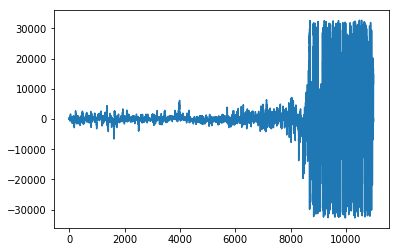

In [582]:
p.plot(a*b)

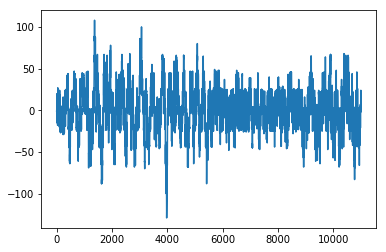

In [568]:
p.plot(b)

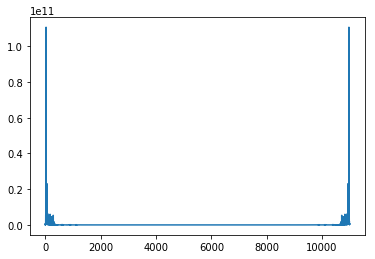

In [585]:
p.plot((np.abs(c)*np.abs(d))[0:11000])

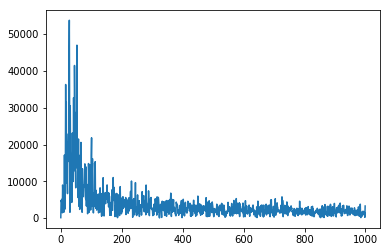

In [581]:
p.plot(np.abs(d)[0:1000])

In [598]:
np.vdot(a,b)

6818

In [601]:
abs(np.vdot(c,d))/44100**2*11000

167599.4436474547